In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.simplefilter('ignore')

In [29]:
ds = pd.read_csv('D:/3Kurs/1Sem/SS/Practice/rgr/data/weatherHistory_fixed.csv')

In [30]:
ds

,Unnamed: 0,Formatted_Date,Summary,Precip_Type,Temperature,Apparent_Temperature,Humidity,Wind_Speed,Wind_Bearing,Visibility,Loud_Cover,Pressure,Daily_Summary
0,0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.
...,...,...,...,...,...,...,...,...,...,...,...,...,...
96448,96448,2016-09-09 19:00:00.000 +0200,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36,Partly cloudy starting in the morning.
96449,96449,2016-09-09 20:00:00.000 +0200,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16,Partly cloudy starting in the morning.
96450,96450,2016-09-09 21:00:00.000 +0200,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66,Partly cloudy starting in the morning.
96451,96451,2016-09-09 22:00:00.000 +0200,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,0.0,1015.95,Partly cloudy starting in the morning.


In [31]:
r = 0
missing = list()
for x in ds.columns:
    if ds[x].isnull().sum() != 0:
        print(x, ds[x].isnull().sum(), "\t\t\t\t\t",round((ds[x].isnull().sum()*100)/ds.shape[0],2),"%")
        missing.append(x)
        r+=1

print("\nCount columns: ", r)

Precip_Type 517 					 0.54 %

Count columns:  1


#### Only one column has missing values, so all rows can be deleted without affecting the model itself.

In [32]:
ds.dropna(axis=0, inplace=True)

r = 0
missing = list()
for x in ds.columns:
    if ds[x].isnull().sum() != 0:
        print(x, ds[x].isnull().sum(), "\t\t\t\t\t",round((ds[x].isnull().sum()*100)/ds.shape[0],2),"%")
        missing.append(x)
        r+=1

print("\nCount columns: ", r)


Count columns:  0


## Processing of outliers

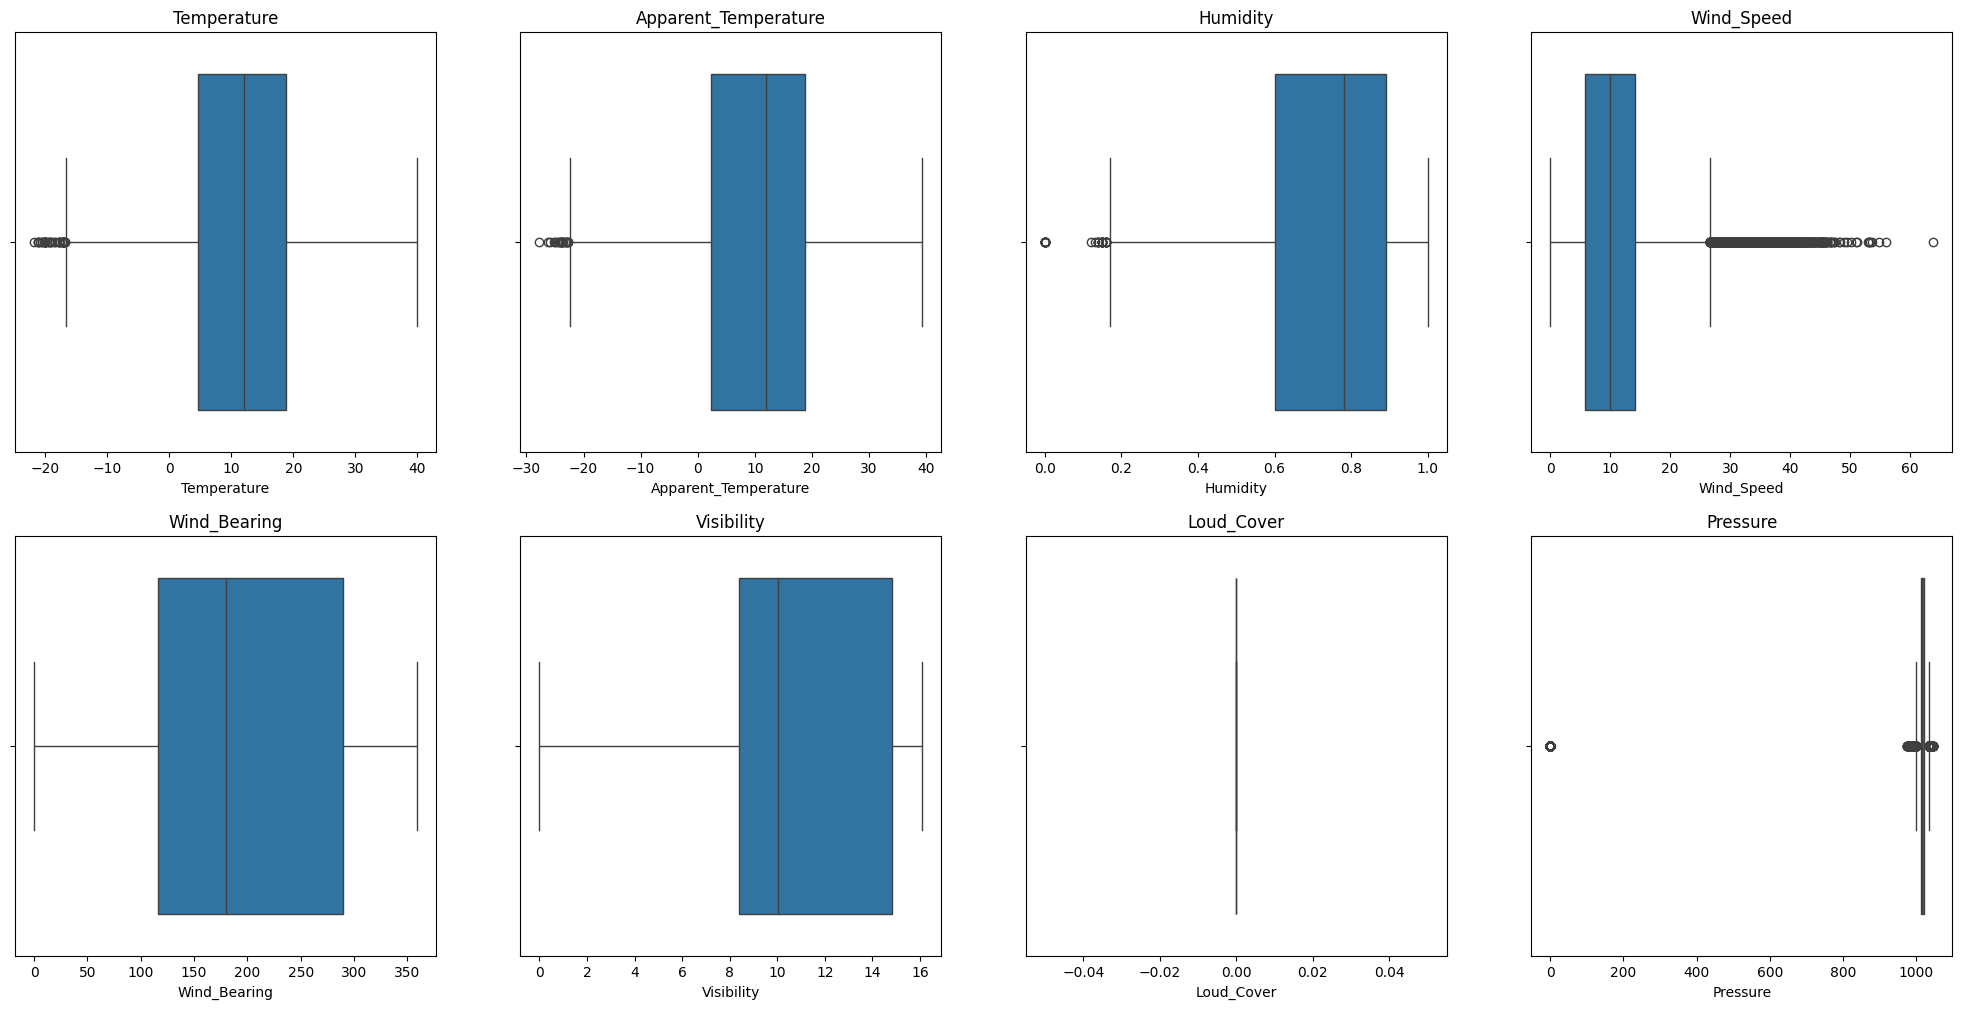

In [33]:
num_cols = ds.select_dtypes(include=np.number).columns

fig , ax = plt.subplots(2,4,figsize=(25,12))
for i in range(len(num_cols[1:])):
    row = i // 4
    col = i % 4

    sns.boxplot(x=ds[num_cols[i+1]],ax= ax[row,col])
    ax[row,col].set_title(num_cols[i+1])

plt.show()

#### To analyze the outlies, I will divide them into left and right parts, where I will analyze them separately.

In [34]:
ds.columns

Index(['Unnamed: 0', 'Formatted_Date', 'Summary', 'Precip_Type', 'Temperature',
       'Apparent_Temperature', 'Humidity', 'Wind_Speed', 'Wind_Bearing',
       'Visibility', 'Loud_Cover', 'Pressure', 'Daily_Summary'],
      dtype='object')

In [35]:
outliers_left_columns = ['Temperature','Apparent_Temperature','Humidity','Pressure']

outliers_right_columns = [ 'Wind_Speed', 'Pressure']

#### Method that determines the boundaries of distribution.

In [36]:
def find_skewed_boundaries(df, variable, distance):

    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)

    lower_boundary = df[variable].quantile(0.25) - (IQR * distance)
    upper_boundary = df[variable].quantile(0.75) + (IQR * distance)

    return upper_boundary, lower_boundary

In [37]:
for column in outliers_left_columns:
    upper_boundary, lower_boundary = find_skewed_boundaries(ds, column, 3)
    median_value = ds[column].median()
    ds.loc[ds[column] < lower_boundary, column] = median_value

for column in outliers_right_columns:
    upper_boundary, lower_boundary = find_skewed_boundaries(ds, column, 3)
    median_value = ds[column].median()
    ds.loc[ds[column] > upper_boundary, column] = median_value


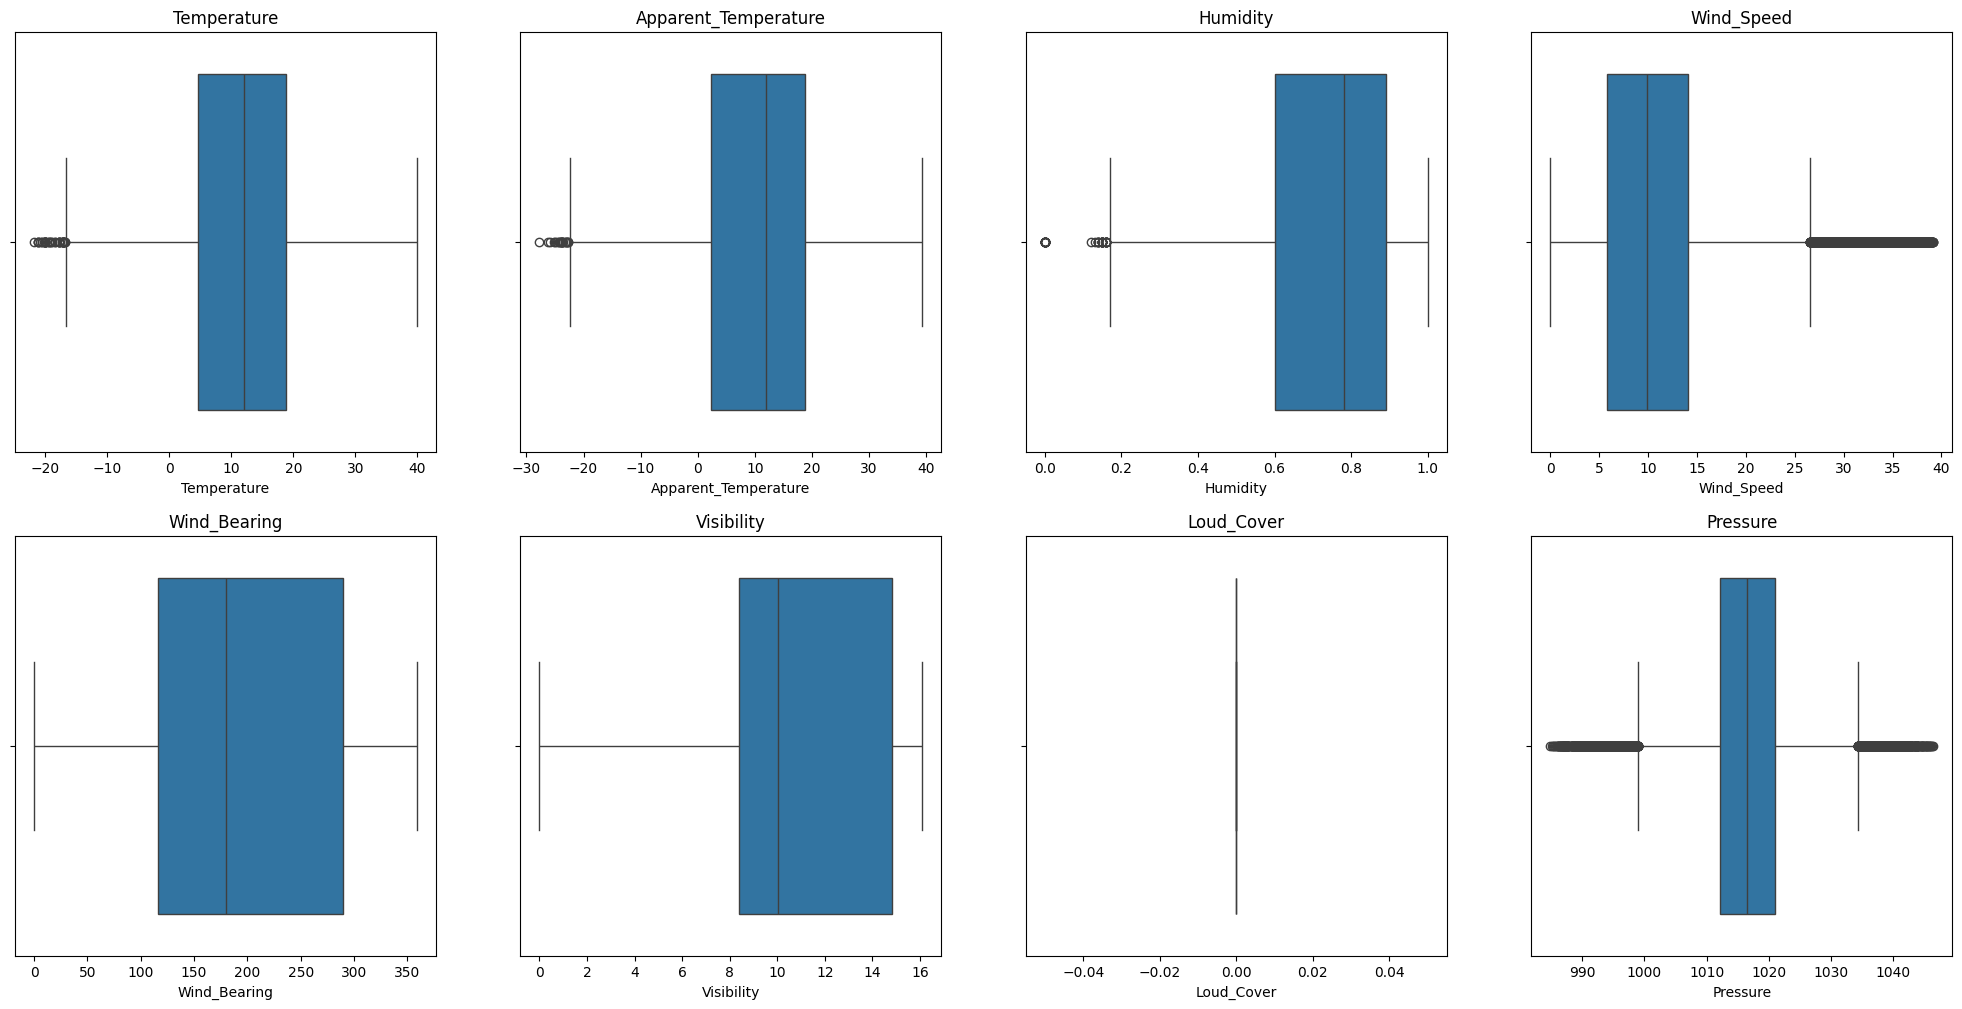

In [38]:
num_cols = ds.select_dtypes(include=np.number).columns

fig , ax = plt.subplots(2,4,figsize=(25,12))
for i in range(len(num_cols[1:])):
    row = i // 4
    col = i % 4

    sns.boxplot(x=ds[num_cols[i+1]],ax= ax[row,col])
    ax[row,col].set_title(num_cols[i+1])

plt.show()

### The following number of columns look normal.

### And now I'm going to delete the columns I mentioned in “Data_understanding.ipynb”.
#### 1. “Apparent_Temperature” - because it directly depends on the ‘Temperature’ column.
#### 2. “Loud_Cover” - because it is constant everywhere and is equal to 0.0, so it does not bring any benefit to the model.
#### 3. “Daily_Summary” - because it is a complete description of such columns as ‘Summary’ and ‘Precip_Type’, so after coding these two columns, this column is not needed.

In [39]:
ds = ds.drop(['Apparent_Temperature', 'Loud_Cover', 'Daily_Summary'], axis=1)

### Now I'm going to do some manipulations with the categorical columns and at the same time encode

#### First, I'll work on the “Summary” column, so I wrote a code that performs the following actions:
#### The code processes the “Summary” column, splitting its text into separate weather conditions (for example, “Windy”, “Foggy”) using “replace” and “split”, and collects all unique conditions into a set. For each unique condition, a new binary column is created in the data frame. Then, for each row, it checks whether the condition is present in the “Summary” text and sets a “1” if found, or a “0” otherwise. The result is a structured DataFrame with one column per condition, indicating whether it is present for each row.

In [40]:
# Extract unique weather conditions
conditions = set()
for summary in ds['Summary']:
    parts = summary.replace(' and ', ', ').split(', ')
    conditions.update(parts)

# Create binary columns for each condition
for condition in conditions:
    ds[condition] = ds['Summary'].apply(lambda x: 1 if condition in x else 0)



In [41]:
ds_summary = ds['Summary']
ds_summary.to_csv('D:/3Kurs/1Sem/SS/Practice/rgr/data/weatherHistory_Summary1.csv')

In [42]:
ds.columns

Index(['Unnamed: 0', 'Formatted_Date', 'Summary', 'Precip_Type', 'Temperature',
       'Humidity', 'Wind_Speed', 'Wind_Bearing', 'Visibility', 'Pressure',
       'Partly Cloudy', 'Humid', 'Rain', 'Dry', 'Breezy', 'Light Rain',
       'Clear', 'Overcast', 'Windy', 'Dangerously Windy', 'Foggy', 'Drizzle',
       'Mostly Cloudy'],
      dtype='object')

In [43]:
ds.head()

,Unnamed: 0,Formatted_Date,Summary,Precip_Type,Temperature,Humidity,Wind_Speed,Wind_Bearing,Visibility,Pressure,...,Dry,Breezy,Light Rain,Clear,Overcast,Windy,Dangerously Windy,Foggy,Drizzle,Mostly Cloudy
0,0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,0.89,14.1197,251.0,15.8263,1015.13,...,0,0,0,0,0,0,0,0,0,0
1,1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,0.86,14.2646,259.0,15.8263,1015.63,...,0,0,0,0,0,0,0,0,0,0
2,2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,0.89,3.9284,204.0,14.9569,1015.94,...,0,0,0,0,0,0,0,0,0,1
3,3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,0.83,14.1036,269.0,15.8263,1016.41,...,0,0,0,0,0,0,0,0,0,0
4,4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,0.83,11.0446,259.0,15.8263,1016.51,...,0,0,0,0,0,0,0,0,0,1


#### Next, I have a column called “Precip_Type”, it contains the following two weather conditions “Rain” and “Snow”, and since the “Summary” column also contains the value “Rain”, I will do the coding and combine the two columns from “Precip_Type” and “Summary”.

In [44]:
ds['Precip_Rain'] = ds['Precip_Type'].apply(lambda x: 1 if x == 'rain' else 0)
ds['Snow'] = ds['Precip_Type'].apply(lambda x: 1 if x == 'snow' else 0)

ds['Rain'] = ds[['Rain', 'Precip_Rain']].sum(axis=1).clip(upper=1)

ds = ds.drop(columns=[ 'Precip_Rain'])


In [45]:
ds.sample(8)

,Unnamed: 0,Formatted_Date,Summary,Precip_Type,Temperature,Humidity,Wind_Speed,Wind_Bearing,Visibility,Pressure,...,Breezy,Light Rain,Clear,Overcast,Windy,Dangerously Windy,Foggy,Drizzle,Mostly Cloudy,Snow
42507,42507,2010-10-14 04:00:00.000 +0200,Partly Cloudy,rain,4.855556,0.86,10.7387,10.0,7.2128,1012.84,...,0,0,0,0,0,0,0,0,0,0
77624,77624,2014-10-16 12:00:00.000 +0200,Overcast,rain,16.138889,0.99,4.4114,337.0,4.6207,1011.22,...,0,0,0,1,0,0,0,0,0,0
41983,41983,2010-11-21 08:00:00.000 +0100,Mostly Cloudy,rain,7.200000,0.94,11.0446,81.0,10.7870,1015.26,...,0,0,0,0,0,0,0,0,1,0
40307,40307,2010-03-14 11:00:00.000 +0100,Breezy and Partly Cloudy,rain,7.872222,0.62,36.6275,310.0,11.2700,1017.48,...,1,0,0,0,0,0,0,0,0,0
149,149,2006-04-15 05:00:00.000 +0200,Mostly Cloudy,rain,7.627778,0.86,6.5205,319.0,13.3791,1017.15,...,0,0,0,0,0,0,0,0,1,0
68244,68244,2013-11-02 13:00:00.000 +0100,Mostly Cloudy,rain,19.838889,0.53,20.6080,199.0,14.0553,1015.09,...,0,0,0,0,0,0,0,0,1,0
87906,87906,2016-04-18 21:00:00.000 +0200,Overcast,rain,17.522222,0.65,10.5777,46.0,16.1000,1015.18,...,0,0,0,1,0,0,0,0,0,0
87974,87974,2016-04-20 17:00:00.000 +0200,Partly Cloudy,rain,16.111111,0.30,19.8996,349.0,15.5526,1023.93,...,0,0,0,0,0,0,0,0,0,0


#### And now I'll work on the “Formatted_Date” column, which contains such data as year, month, day, hour, so I'll split them by columns myself.

In [46]:
# Convert the "Formatted_Date" column to datetime with correct parsing
ds['Formatted_Date'] = pd.to_datetime(ds['Formatted_Date'], errors='coerce', utc=True)

# Convert the "Formatted_Date" column to datetime
ds['Formatted_Date'] = pd.to_datetime(ds['Formatted_Date'], format='%Y-%m-%d %H:%M:%S.%f %z')

# Extract year, month, day, and hour in seconds
ds['Year'] = ds['Formatted_Date'].dt.year
ds['Month'] = ds['Formatted_Date'].dt.month
ds['Hour'] = ds['Formatted_Date'].dt.hour


In [47]:
ds.sample(8)

,Unnamed: 0,Formatted_Date,Summary,Precip_Type,Temperature,Humidity,Wind_Speed,Wind_Bearing,Visibility,Pressure,...,Overcast,Windy,Dangerously Windy,Foggy,Drizzle,Mostly Cloudy,Snow,Year,Month,Hour
15356,15356,2007-05-09 19:00:00+00:00,Mostly Cloudy,rain,11.322222,0.85,9.8854,280.0,9.9820,1016.42,...,0,0,0,0,0,1,0,2007,5,19
33815,33815,2009-10-16 22:00:00+00:00,Partly Cloudy,rain,2.777778,0.85,3.2200,170.0,16.1000,1017.10,...,0,0,0,0,0,0,0,2009,10,22
1454,1454,2006-08-09 12:00:00+00:00,Mostly Cloudy,rain,23.900000,0.61,9.6278,285.0,11.0768,1009.59,...,0,0,0,0,0,1,0,2006,8,12
83163,83163,2015-07-05 04:00:00+00:00,Partly Cloudy,rain,17.650000,0.84,3.4293,301.0,16.1000,1019.44,...,0,0,0,0,0,0,0,2015,7,4
84370,84370,2015-03-23 12:00:00+00:00,Clear,rain,12.233333,0.40,11.4149,42.0,15.5526,1019.87,...,0,0,0,0,0,0,0,2015,3,12
51638,51638,2011-10-28 13:00:00+00:00,Clear,rain,15.022222,0.44,14.1036,130.0,9.9820,1028.47,...,0,0,0,0,0,0,0,2011,10,13
80839,80839,2015-12-27 09:00:00+00:00,Foggy,rain,0.338889,0.99,6.6976,16.0,0.4669,1033.37,...,0,0,0,1,0,0,0,2015,12,9
65493,65493,2013-07-27 19:00:00+00:00,Partly Cloudy,rain,24.144444,0.65,4.8139,180.0,9.9820,1013.27,...,0,0,0,0,0,0,0,2013,7,19


In [48]:
ds.describe()

,Unnamed: 0,Temperature,Humidity,Wind_Speed,Wind_Bearing,Visibility,Pressure,Partly Cloudy,Humid,Rain,...,Overcast,Windy,Dangerously Windy,Foggy,Drizzle,Mostly Cloudy,Snow,Year,Month,Hour
count,95936.000000,95936.000000,95936.000000,95936.000000,95936.000000,95936.000000,95936.000000,95936.000000,95936.000000,95936.000000,...,95936.000000,95936.000000,95936.000000,95936.000000,95936.000000,95936.000000,95936.000000,95936.000000,95936.000000,95936.000000
mean,48031.729299,11.940976,0.734841,10.733398,187.518773,10.362402,1016.804800,0.335557,0.000667,0.888342,...,0.178202,0.001678,0.000010,0.074591,0.000407,0.297271,0.111658,2010.979309,6.512164,11.497915
std,27761.426989,9.570671,0.195724,6.754790,107.385351,4.173780,7.695694,0.472187,0.025820,0.314947,...,0.382685,0.040932,0.003229,0.262732,0.020158,0.457059,0.314947,3.154958,3.449543,6.922062
min,0.000000,-21.822222,0.000000,0.000000,0.000000,0.000000,984.900000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2005.000000,1.000000,0.000000
25%,23983.750000,4.604167,0.600000,5.796000,116.000000,8.372000,1012.200000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2008.000000,4.000000,5.000000
50%,47967.500000,12.033333,0.780000,9.933700,180.000000,10.046400,1016.420000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2011.000000,7.000000,11.000000
75%,72094.250000,18.844444,0.890000,14.103600,290.000000,14.812000,1021.050000,1.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2014.000000,9.000000,17.000000
max,96452.000000,39.905556,1.000000,39.155200,359.000000,16.100000,1046.380000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2016.000000,12.000000,23.000000


#### You can see that there is a column (or columns) where the wrong year of weather conditions was specified, let's determine which columns these are.

In [49]:
# Check rows where the 'year' column is 2005
filtered_rows = ds[ds['Year'] == 2005]
filtered_rows


,Unnamed: 0,Formatted_Date,Summary,Precip_Type,Temperature,Humidity,Wind_Speed,Wind_Bearing,Visibility,Pressure,...,Overcast,Windy,Dangerously Windy,Foggy,Drizzle,Mostly Cloudy,Snow,Year,Month,Hour
2880,2880,2005-12-31 23:00:00+00:00,Partly Cloudy,rain,0.577778,0.89,17.1143,140.0,9.982,1016.66,...,0,0,0,0,0,0,0,2005,12,23


### There is only one column so i just can change the wrong year.

In [50]:
ds.loc[ds['Year'] == 2005, 'Year'] = 2006
ds.describe()

,Unnamed: 0,Temperature,Humidity,Wind_Speed,Wind_Bearing,Visibility,Pressure,Partly Cloudy,Humid,Rain,...,Overcast,Windy,Dangerously Windy,Foggy,Drizzle,Mostly Cloudy,Snow,Year,Month,Hour
count,95936.000000,95936.000000,95936.000000,95936.000000,95936.000000,95936.000000,95936.000000,95936.000000,95936.000000,95936.000000,...,95936.000000,95936.000000,95936.000000,95936.000000,95936.000000,95936.000000,95936.000000,95936.00000,95936.000000,95936.000000
mean,48031.729299,11.940976,0.734841,10.733398,187.518773,10.362402,1016.804800,0.335557,0.000667,0.888342,...,0.178202,0.001678,0.000010,0.074591,0.000407,0.297271,0.111658,2010.97932,6.512164,11.497915
std,27761.426989,9.570671,0.195724,6.754790,107.385351,4.173780,7.695694,0.472187,0.025820,0.314947,...,0.382685,0.040932,0.003229,0.262732,0.020158,0.457059,0.314947,3.15494,3.449543,6.922062
min,0.000000,-21.822222,0.000000,0.000000,0.000000,0.000000,984.900000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2006.00000,1.000000,0.000000
25%,23983.750000,4.604167,0.600000,5.796000,116.000000,8.372000,1012.200000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2008.00000,4.000000,5.000000
50%,47967.500000,12.033333,0.780000,9.933700,180.000000,10.046400,1016.420000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2011.00000,7.000000,11.000000
75%,72094.250000,18.844444,0.890000,14.103600,290.000000,14.812000,1021.050000,1.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2014.00000,9.000000,17.000000
max,96452.000000,39.905556,1.000000,39.155200,359.000000,16.100000,1046.380000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2016.00000,12.000000,23.000000


### Data scale

#### I chose the following 4 columns to apply scaling to: “Temperature”, “Wind_Bearing”, “Pressure”, and “Wind_Speed” because they have wide limits that may affect some models.

In [51]:
# Columns to scale
columns_to_scale = ['Temperature','Wind_Bearing', 'Pressure', 'Wind_Speed']

ds[columns_to_scale].describe()

,Temperature,Wind_Bearing,Pressure,Wind_Speed
count,95936.000000,95936.000000,95936.000000,95936.000000
mean,11.940976,187.518773,1016.804800,10.733398
std,9.570671,107.385351,7.695694,6.754790
min,-21.822222,0.000000,984.900000,0.000000
25%,4.604167,116.000000,1012.200000,5.796000
50%,12.033333,180.000000,1016.420000,9.933700
75%,18.844444,290.000000,1021.050000,14.103600
max,39.905556,359.000000,1046.380000,39.155200


In [52]:
scaler = MinMaxScaler()
ds[columns_to_scale] = scaler.fit_transform(ds[columns_to_scale])

ds[columns_to_scale].describe()

,Temperature,Wind_Bearing,Pressure,Wind_Speed
count,95936.000000,95936.000000,95936.000000,95936.000000
mean,0.546969,0.522336,0.518946,0.274124
std,0.155046,0.299124,0.125174,0.172513
min,0.000000,0.000000,0.000000,0.000000
25%,0.428112,0.323120,0.444047,0.148026
50%,0.548465,0.501393,0.512687,0.253701
75%,0.658807,0.807799,0.587996,0.360197
max,1.000000,1.000000,1.000000,1.000000


### Now I'll remove the encoded columns.

In [53]:
ds = ds.drop(['Formatted_Date', 'Summary', 'Precip_Type','Unnamed: 0'], axis=1)
ds.sample(5)

,Temperature,Humidity,Wind_Speed,Wind_Bearing,Visibility,Pressure,Partly Cloudy,Humid,Rain,Dry,...,Overcast,Windy,Dangerously Windy,Foggy,Drizzle,Mostly Cloudy,Snow,Year,Month,Hour
73437,0.325803,0.92,0.637336,0.083565,1.4490,0.406799,0,0,0,0,...,0,0,0,1,0,0,1,2014,1,20
32598,0.641526,0.65,0.246711,0.139276,9.9820,0.523748,0,0,1,0,...,0,0,0,0,0,0,0,2009,5,5
50538,0.352444,0.83,0.164474,0.612813,5.6511,0.834092,0,0,0,0,...,0,0,0,0,0,0,1,2011,11,18
67383,0.694447,0.47,0.090872,0.495822,11.2056,0.408100,1,0,1,0,...,0,0,0,0,0,0,0,2013,5,14
70315,0.497885,0.44,0.452303,0.866295,10.2557,0.480156,1,0,1,0,...,0,0,0,0,0,0,0,2014,4,17


### Save the edited dataset.

In [54]:
ds.to_csv('D:/3Kurs/1Sem/SS/Practice/rgr/data/weatherHistory_clean.csv')
